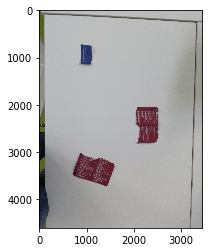

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

im=cv2.imread("IMG_20180812_131323.jpg");
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.show();

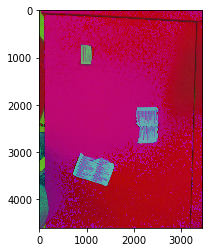

In [3]:
hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
plt.imshow(cv2.cvtColor(hsv, cv2.COLOR_BGR2RGB))

992 942


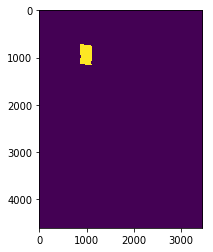

In [4]:
#print(hsv[1000][1000])
bl=(100,120,80)
bh=(150,200,120)
mask=cv2.inRange(hsv,bl,bh)
mask = cv2.dilate(mask, None, iterations=10)
plt.imshow(mask)
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
M = cv2.moments(cnts[0])
x1 = int(M["m10"] / M["m00"])
y1 = int(M["m01"] / M["m00"])
print(x1,y1)

1171 3376
2288 2419


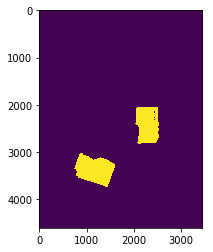

In [6]:
#print(hsv[3500][1000])
rl=(150,120,80)
rh=(200,200,120)
mask=cv2.inRange(hsv,rl,rh)
mask = cv2.dilate(mask, None, iterations=10)
plt.imshow(mask)
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
M = cv2.moments(cnts[0])
x2 = int(M["m10"] / M["m00"])
y2 = int(M["m01"] / M["m00"])
print(x2,y2)
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
M = cv2.moments(cnts[1])
x3 = int(M["m10"] / M["m00"])
y3 = int(M["m01"] / M["m00"])
print(x3,y3)

[ 34  67 209]
701 411


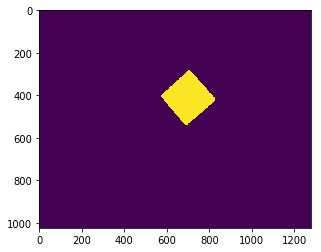

In [60]:
from pypylon import pylon

# conecting to the first available camera
camera = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())

# Grabing Continusely (video) with minimal delay
camera.StartGrabbing(pylon.GrabStrategy_LatestImageOnly) 
converter = pylon.ImageFormatConverter()

# converting to opencv bgr format
converter.OutputPixelFormat = pylon.PixelType_BGR8packed
converter.OutputBitAlignment = pylon.OutputBitAlignment_MsbAligned


grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)
if grabResult.GrabSucceeded():
        # Access the image data
        image = converter.Convert(grabResult)
        im = image.GetArray()
        plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
        hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
        #print(hsv[1000][600])
        rl1=(0,100,100)
        rh1=(10,255,255)
        mask1 = cv2.inRange(hsv,rl1,rh1)
        mask1 = cv2.dilate(mask1, None, iterations=2)
        mask1 = cv2.erode(mask1,None,iterations=3)
        rl2=(160,100,100)
        rh2=(179,255,255)
        mask2 = cv2.inRange(hsv,rl2,rh2)
        mask2 = cv2.erode(mask2,None,iterations=2)
        mask2 = cv2.dilate(mask2, None, iterations=3)
        mask=cv2.addWeighted(mask1,1.0,mask2,1.0,0.0)
        plt.imshow(mask)
        cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
        M = cv2.moments(cnts[0])
        xt = int(M["m10"] / M["m00"])
        yt = int(M["m01"] / M["m00"])
        print(xt,yt)
grabResult.Release()
    
# Releasing the resource    
camera.StopGrabbing()


In [ ]:
import cv2

tracker = cv2.TrackerCSRT_create()
cap=cv2.VideoCapture(0)
success, frame = cap.read()
bbox = cv2.selectROI('Tracker', frame)
print(bbox)
cv2.waitKey(1)
cv2.destroyWindow('Tracker')
success=tracker.init(frame,bbox)
while cap.isOpened():
    success, frame = cap.read()
    success, newbox = tracker.update(frame)
    if success:
        x = (newbox[0]+newbox[2])/2.0;
        y = newbox[1];
        print(x,y)
        p1 = (int(newbox[0]), int(newbox[1]))
        p2 = (int(newbox[0] + newbox[2]), int(newbox[1] + newbox[3]))
        cv2.rectangle(frame, p1, p2, (255,0,0), 2, 1)
    cv2.imshow("1",frame);
    if cv2.waitKey(1) & 0xFF ==ord('q'):
        break
cap.release()
cv2.destroyWindow('1')

In [ ]:
import numpy as np
import cv2
cap = cv2.VideoCapture(0)   #defining the webcam

while True:
    ret, frame = cap.read()
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF ==ord('q'):
        break
cap.release()
cv2.destroyWindow('frame')

In [1]:
from pypylon import pylon
import cv2
# conecting to the first available camera
camera = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())

# Grabing Continusely (video) with minimal delay
camera.StartGrabbing(pylon.GrabStrategy_LatestImageOnly) 
converter = pylon.ImageFormatConverter()

# converting to opencv bgr format
converter.OutputPixelFormat = pylon.PixelType_BGR8packed
converter.OutputBitAlignment = pylon.OutputBitAlignment_MsbAligned


grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)
if grabResult.GrabSucceeded():
        # Access the image data
        image = converter.Convert(grabResult)
        im = image.GetArray()
        cv2.imshow('1',im)
        cv2.waitKey(0)
        cv2.destroyWindow('1')
        hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
        #print(hsv[1000][600])
        rl1=(0,100,100)
        rh1=(10,255,255)
        mask1 = cv2.inRange(hsv,rl1,rh1)
        mask1 = cv2.dilate(mask1, None, iterations=2)
        mask1 = cv2.erode(mask1,None,iterations=3)
        rl2=(160,100,100)
        rh2=(179,255,255)
        mask2 = cv2.inRange(hsv,rl2,rh2)
        mask2 = cv2.erode(mask2,None,iterations=2)
        mask2 = cv2.dilate(mask2, None, iterations=3)
        mask=cv2.addWeighted(mask1,1.0,mask2,1.0,0.0)
        cv2.imshow('1',mask)
        cv2.waitKey(0)
        cv2.destroyWindow('1')        
        cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
        M = cv2.moments(cnts[0])
        xt = int(M["m10"] / M["m00"])
        yt = int(M["m01"] / M["m00"])
        print(xt,yt)

input('change th position of the object');
grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)
if grabResult.GrabSucceeded():
        # Access the image data
        image = converter.Convert(grabResult)
        im = image.GetArray()
        cv2.imshow('1',im)
        cv2.waitKey(0)
        cv2.destroyWindow('1')
        hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
        #print(hsv[1000][600])
        rl1=(0,100,100)
        rh1=(10,255,255)
        mask1 = cv2.inRange(hsv,rl1,rh1)
        mask1 = cv2.dilate(mask1, None, iterations=2)
        mask1 = cv2.erode(mask1,None,iterations=3)
        rl2=(160,100,100)
        rh2=(179,255,255)
        mask2 = cv2.inRange(hsv,rl2,rh2)
        mask2 = cv2.erode(mask2,None,iterations=2)
        mask2 = cv2.dilate(mask2, None, iterations=3)
        mask=cv2.addWeighted(mask1,1.0,mask2,1.0,0.0)
        cv2.imshow('1',mask)
        cv2.waitKey(0)
        cv2.destroyWindow('1')        
        cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
        M = cv2.moments(cnts[0])
        xo = int(M["m10"] / M["m00"])
        yo = int(M["m01"] / M["m00"])
        print(xo,yo)
        
tracker = cv2.TrackerCSRT_create()
grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)
image = converter.Convert(grabResult)
frame = image.GetArray()
input('define the end effector(draw a rectangle around it)')
bbox = cv2.selectROI('Tracker', frame)
print(bbox)
cv2.waitKey(1)
cv2.destroyWindow('Tracker')
success=tracker.init(frame,bbox)
grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)

while grabResult.GrabSucceeded():
    image = converter.Convert(grabResult)
    frame = image.GetArray()
    success, newbox = tracker.update(frame)
    if success:
        x = (newbox[0]+newbox[2])/2.0;
        y = (newbox[1]+newbox[3])/2.0;
        print(x,y)
        p1 = (int(newbox[0]), int(newbox[1]))
        p2 = (int(newbox[0] + newbox[2]), int(newbox[1] + newbox[3]))
        cv2.rectangle(frame, p1, p2, (255,0,0), 2, 1)
    cv2.imshow("1",frame);
    if cv2.waitKey(1) & 0xFF ==ord('q'):
        break
    grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)

cv2.destroyWindow('1')
grabResult.Release()

544 593
change th position of the object1


IndexError: list index out of range

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pypylon import pylon
import cv2
# conecting to the first available camera
camera = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())

# Grabing Continusely (video) with minimal delay
camera.StartGrabbing(pylon.GrabStrategy_LatestImageOnly) 
converter = pylon.ImageFormatConverter()

# converting to opencv bgr format
converter.OutputPixelFormat = pylon.PixelType_BGR8packed
converter.OutputBitAlignment = pylon.OutputBitAlignment_MsbAligned

cv2.namedWindow('1',cv2.WINDOW_NORMAL)
cv2.resizeWindow('1',600,600)
grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)
while grabResult.GrabSucceeded():
    image = converter.Convert(grabResult)
    frame = image.GetArray()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    cv2.imshow('1',frame);
    rl1=(0,100,100)
    rh1=(10,255,255)
    mask1 = cv2.inRange(hsv,rl1,rh1)
    mask1 = cv2.dilate(mask1, None, iterations=4)
    mask1= cv2.erode(mask1,None,iterations=10)
    rl2=(160,100,100)
    rh2=(179,255,255)
    mask2 = cv2.inRange(hsv,rl2,rh2)
    mask2 = cv2.dilate(mask2, None, iterations=4)
    mask2 = cv2.erode(mask2,None,iterations=10)
    mask=cv2.addWeighted(mask1,1.0,mask2,1.0,0.0)
    cv2.imshow('2',mask)
    if cv2.waitKey(1) & 0xFF ==ord('q'):
        cv2.destroyWindow('1')
        cv2.destroyWindow('2')
        break
    grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)
    
grabResult.Release()